# SQDMetal Component gallery

This notebook provides a minimum working examples of all available components in SQDMetal. Note:

- The code can be copied and pasted as a template
- The `import` statement is in the first line while the code for the main component(s) is enclosed within the comments `###`
- The options in the demonstrations are NOT exhaustive. Full list of parameters for finer adjustments can be found in the docstring (e.g. just run `CapacitorInterdigital?`)

The components on display include:

- [Capacitors](#cap)
    - [Interdigital capacitors](#cap-inter)
    - [Gap capacitors](#cap-gap)
    - [Gap meander capacitors](#cap-gap-meander)
    - [Prong capacitors on pin](#cap-prongs)
- [Inductors](#ind)
    - [Meander inductors](#ind-mean)
- [Resonators](#res)
    - [Meander resonators](#res-mean)

More specialised structures include:

- [Bounds](#bounds)
    - [Ground Shields](#bounds-gndshield)

*To regenerate this notebook, run this initialisation cell first*.

In [1]:
%load_ext autoreload
%autoreload 2
from qiskit_metal import designs
from SQDMetal.Utilities.QUtilities import QUtilities
import matplotlib.pyplot as plt
import numpy as np
from qiskit_metal.toolbox_python.attr_dict import Dict
design = designs.DesignPlanar({}, overwrite_enabled=True)
%matplotlib inline

# Capacitors  <a class="anchor" id="cap"></a>

## Interdigital capacitors  <a class="anchor" id="cap-inter"></a>

Using absolute coordinates

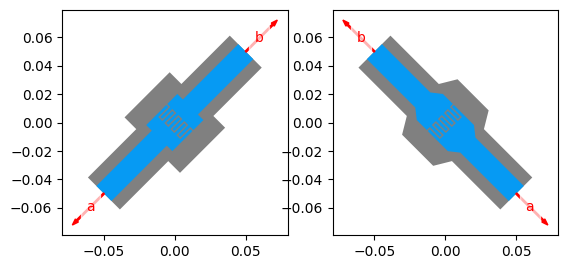

In [2]:
from SQDMetal.Comps.Capacitors import CapacitorInterdigital

design.delete_all_components()
fig, axs = plt.subplots(ncols=2)

##FLAT EDGES##############
CapacitorInterdigital(design, 'leCap', options=dict(pos_x='-50um', pos_y='-50um', end_x='50um' , end_y='50um',
                                                    cpw_width='15um', len_flat='10um', fing_len='10um', fing_len_gap='1um', fing_wid='2um',
                                                    len_diag=0, init_pad='7um', fing_wid_gap='1um', N_total=9, larger_first=True))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[0])
design.delete_all_components()

##DIAGONAL EDGES##########
CapacitorInterdigital(design, 'leCap', options=dict(pos_x='50um', pos_y='-50um', end_x='-50um' , end_y='50um',
                                                    cpw_width='15um', len_flat='10um', fing_len='10um', fing_len_gap='1um', fing_wid='2um',
                                                    len_diag='7um', fing_wid_gap='1um', N_total=9, larger_first=True))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[1])

Using relative coordinates

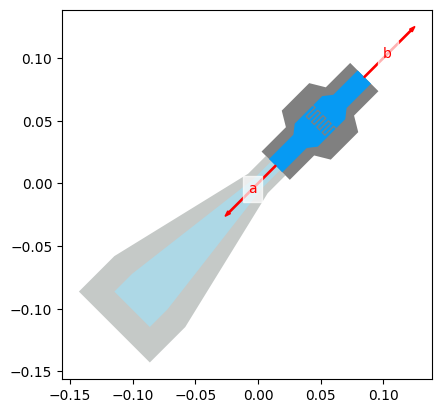

In [3]:
from SQDMetal.Comps.Capacitors import CapacitorInterdigitalPinStretch

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='45', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))

##########################
CapacitorInterdigitalPinStretch(design, 'leCap', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')), dist_extend='100um',
                                                    cpw_width='15um', len_flat='10um', fing_len='10um', fing_len_gap='1um', fing_wid='2um',
                                                    len_diag='7um', fing_wid_gap='1um', N_total=9, larger_first=True))
##########################

QUtilities.plot_highlight_component('leCap', design)

Using pins (it doesn't draw the leads and requires wiring constructs as shown in the second image)

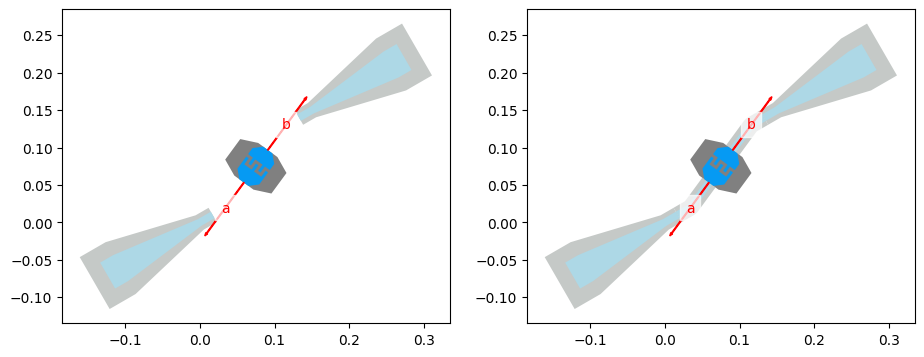

In [4]:
from SQDMetal.Comps.Capacitors import CapacitorInterdigitalPinPin

from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='150um', pos_y='150um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
fig, axs = plt.subplots(ncols=2); fig.set_figwidth(11)
JointExtend(design, 'jnt1', options=Dict(jointObj='LP1', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))
JointExtend(design, 'jnt2', options=Dict(jointObj='LP2', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))

##########################
CapacitorInterdigitalPinPin(design, 'leCap', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'jnt1',pin='a'), end_pin=Dict(component=f'jnt2',pin='a')),
                                                    cpw_width='15um', len_flat='10um', fing_len='10um', fing_len_gap='4um', fing_wid='4um',
                                                    len_diag='10um', fing_wid_gap='4um', N_total=5, larger_first=True))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[0])

WirePins(design, 'lead1', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', ('leCap', 'a')], fillet='10um'))
WirePins(design, 'lead2', options=Dict(pathObjPins=[('LP2', 'tie'), 'jnt2', ('leCap', 'b')], fillet='10um'))

QUtilities.plot_highlight_component('leCap', design, ax=axs[1])

## Gap capacitors  <a class="anchor" id="cap-gap"></a>

Using absolute coordinates

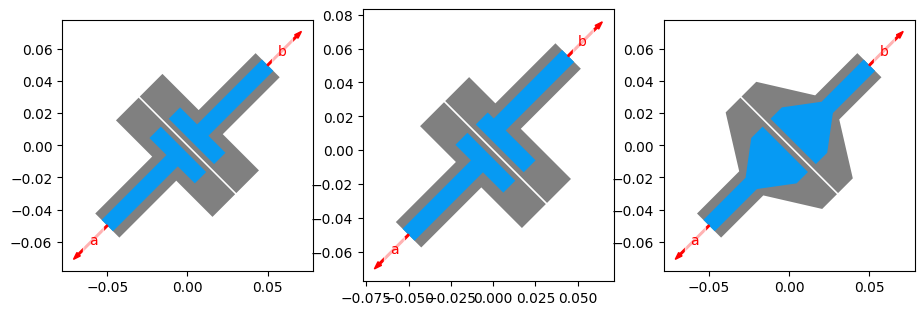

In [5]:
from SQDMetal.Comps.Capacitors import CapacitorGap

design.delete_all_components()
fig, axs = plt.subplots(ncols=3); fig.set_figwidth(11)

##FLAT EDGES##############
CapacitorGap(design, 'leCap', options=dict(pos_x='-50um', pos_y='-50um', end_x='50um' , end_y='50um',
                                           cpw_width='10um', cap_width='40um', len_flat='10um',
                                           len_diag=0, init_pad='7um', cap_gap='7um', gnd_width='1um'))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[0])
design.delete_all_components()

##OFFSET LEADS############
CapacitorGap(design, 'leCap', options=dict(pos_x='-50um', pos_y='-50um', end_x='50um' , end_y='50um',
                                           cpw_width='10um', cap_width='40um', len_flat='10um',
                                           len_diag=0, init_pad='7um', cap_gap='7um', gnd_width='1um',
                                           offset_lead1='2um', offset_lead2='10um'))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[1])
design.delete_all_components()

##DIAGONAL EDGES##########
CapacitorGap(design, 'leCap', options=dict(pos_x='-50um', pos_y='-50um', end_x='50um' , end_y='50um',
                                           cpw_width='10um', cap_width='40um', len_flat='10um',
                                           len_diag='20um', init_pad='7um', cap_gap='7um', gnd_width='1um'))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[2])

Using relative coordinates

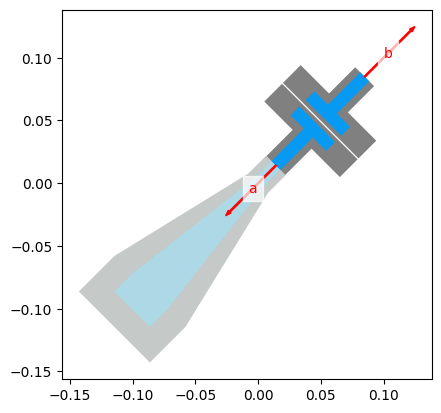

In [6]:
from SQDMetal.Comps.Capacitors import CapacitorGapPinStretch

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='45', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))

##########################
CapacitorGapPinStretch(design, 'leCap', options=dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')), dist_extend='100um',
                                           cpw_width='10um', cap_width='40um', len_flat='10um',
                                           len_diag=0, init_pad='7um', cap_gap='7um', gnd_width='1um'))
##########################

QUtilities.plot_highlight_component('leCap', design)

Using pins (it doesn't draw the leads and requires wiring constructs as shown in the second image)

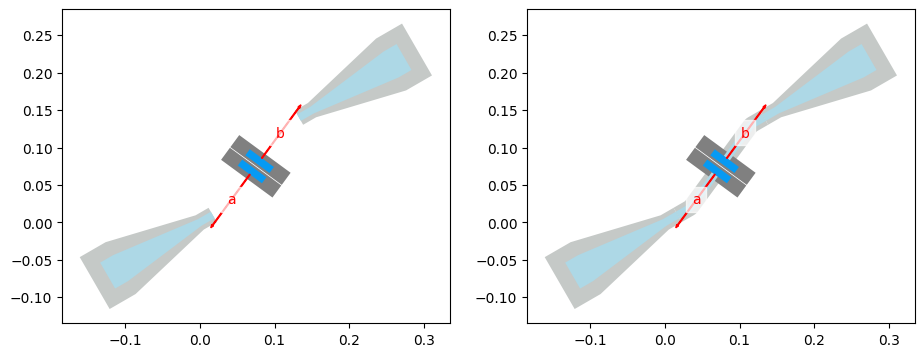

In [7]:
from SQDMetal.Comps.Capacitors import CapacitorGapPinPin

from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='150um', pos_y='150um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
fig, axs = plt.subplots(ncols=2); fig.set_figwidth(11)
JointExtend(design, 'jnt1', options=Dict(jointObj='LP1', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))
JointExtend(design, 'jnt2', options=Dict(jointObj='LP2', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))

##########################
CapacitorGapPinPin(design, 'leCap', options=dict(pin_inputs=Dict(start_pin=Dict(component=f'jnt1',pin='a'), end_pin=Dict(component=f'jnt2',pin='a')),
                                                 cpw_width='10um', cap_width='40um', len_flat='10um',
                                                 len_diag=0, init_pad='7um', cap_gap='7um', gnd_width='1um'))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[0])

WirePins(design, 'lead1', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', ('leCap', 'a')], fillet='10um'))
WirePins(design, 'lead2', options=Dict(pathObjPins=[('LP2', 'tie'), 'jnt2', ('leCap', 'b')], fillet='10um'))

QUtilities.plot_highlight_component('leCap', design, ax=axs[1])

## Gap meander capacitors  <a class="anchor" id="cap-gap-meander"></a>

Using absolute coordinates

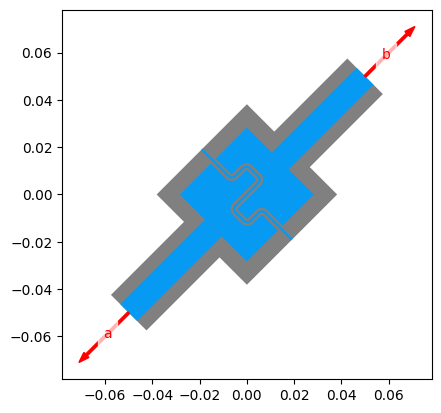

In [8]:
from SQDMetal.Comps.Capacitors import CapacitorGapMeander

design.delete_all_components()

##########################
CapacitorGapMeander(design, 'leCap', options=dict(pos_x='-50um', pos_y='-50um', end_x='50um' , end_y='50um',
                                                  cpw_width='10um', cap_width='40um', cap_length='40um',
                                                  init_pad='7um', side_gap='7um',
                                                  mean_total_length='70um', mean_constr_radius='2um',
                                                  mean_gnd_width='1um', mean_gnd_gap='1um',
                                                  mean_constr_width_max=0, mean_fillet_padding='5um'))
##########################

QUtilities.plot_highlight_component('leCap', design)

Using relative coordinates

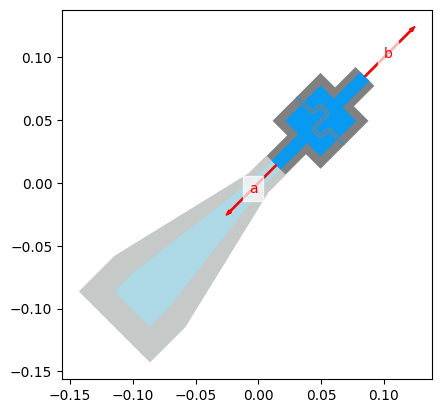

In [9]:
from SQDMetal.Comps.Capacitors import CapacitorGapMeanderPinStretch

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='45', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))

##########################
CapacitorGapMeanderPinStretch(design, 'leCap', options=dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')), dist_extend='100um',
                                                            cpw_width='10um', cap_width='40um', cap_length='40um',
                                                            init_pad='7um', side_gap='7um',
                                                            mean_total_length='70um', mean_constr_radius='2um',
                                                            mean_gnd_width='1um', mean_gnd_gap='1um',
                                                            mean_constr_width_max=0, mean_fillet_padding='5um'))
##########################

QUtilities.plot_highlight_component('leCap', design)

Using pins (it doesn't draw the leads and requires wiring constructs as shown in the second image)

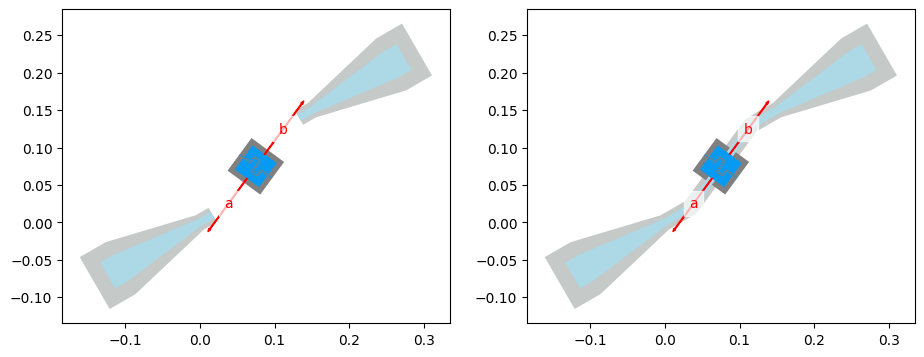

In [10]:
from SQDMetal.Comps.Capacitors import CapacitorGapMeanderPinPin

from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='150um', pos_y='150um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
fig, axs = plt.subplots(ncols=2); fig.set_figwidth(11)
JointExtend(design, 'jnt1', options=Dict(jointObj='LP1', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))
JointExtend(design, 'jnt2', options=Dict(jointObj='LP2', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))

##########################
CapacitorGapMeanderPinPin(design, 'leCap', options=dict(pin_inputs=Dict(start_pin=Dict(component=f'jnt1',pin='a'), end_pin=Dict(component=f'jnt2',pin='a')),
                                                        cpw_width='10um', cap_width='40um', cap_length='40um',
                                                        init_pad='7um', side_gap='7um',
                                                        mean_total_length='70um', mean_constr_radius='2um',
                                                        mean_gnd_width='1um', mean_gnd_gap='1um',
                                                        mean_constr_width_max=0, mean_fillet_padding='5um'))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[0])

WirePins(design, 'lead1', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', ('leCap', 'a')], fillet='10um'))
WirePins(design, 'lead2', options=Dict(pathObjPins=[('LP2', 'tie'), 'jnt2', ('leCap', 'b')], fillet='10um'))

QUtilities.plot_highlight_component('leCap', design, ax=axs[1])

## Prong capacitors on pin <a class="anchor" id="cap-prongs"></a>

Simple prong capacitor

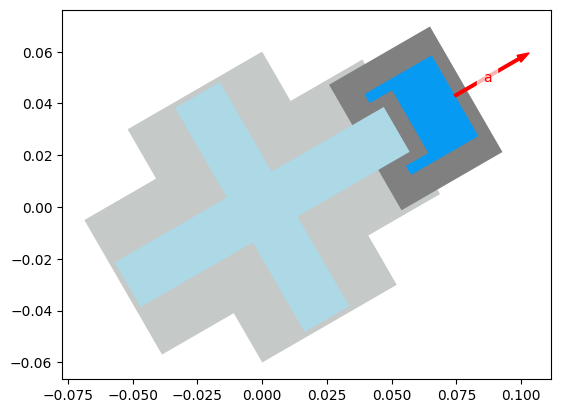

In [11]:
from SQDMetal.Comps.Capacitors import CapacitorProngPin

from SQDMetal.Comps.Xmon import Xmon
design.delete_all_components()
Xmon(design, 'xmon', options=Dict(orientation=30))

##########################
CapacitorProngPin(design, 'leCap', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'xmon',pin='right')),
                                                prong_width='4um', prong_length='10um', pin_gap_side='4um',
                                                gap_side='10um', pad_thickness='20um',
                                                gap_front='10um', gap_back='5um', trace_width='10um'))
##########################

QUtilities.plot_highlight_component('leCap', design)

Prong capacitor with ground-plane going in between:

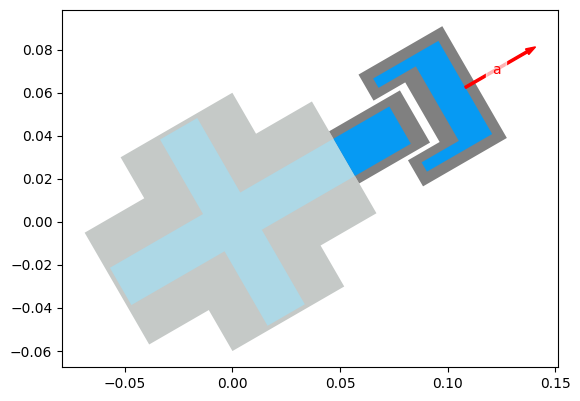

In [12]:
from SQDMetal.Comps.Capacitors import CapacitorUcapGroundPin

from SQDMetal.Comps.Xmon import Xmon
design.delete_all_components()
Xmon(design, 'xmon', options=Dict(orientation=30, gap_right=0))

##########################
CapacitorUcapGroundPin(design, 'leCap', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'xmon',pin='right')),
                                                     prong_trace_gap='10um', pad_trace_gap='20um',
                                                     prong_width='5um', prong_length='20um',
                                                     gnd_prong_trace='2um', gnd_pad_trace='4um',
                                                     pad_thickness='15um'))
##########################

QUtilities.plot_highlight_component('leCap', design)

# Inductors  <a class="anchor" id="ind"></a>

## Meander inductors  <a class="anchor" id="ind-mean"></a>

Using absolute coordinates

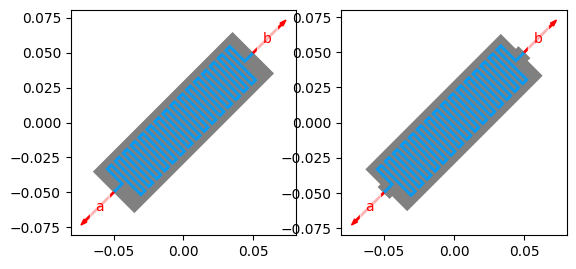

In [13]:
from SQDMetal.Comps.Inductors import InductorMeander

design.delete_all_components()
fig, axs = plt.subplots(ncols=2)

##NO INITIAL GAP##########
InductorMeander(design, 'leInd', options=dict(pos_x='-50um', pos_y='-50um', end_x='50um' , end_y='50um',
                                              track_width='2um', meander_spacing='4um', meander_width='30um', num_long_sections=30,
                                              init_gap=0, mean_gap='5um'))
##########################

QUtilities.plot_highlight_component('leInd', design, ax=axs[0])
design.delete_all_components()

##INITIAL GAP#############
InductorMeander(design, 'leInd', options=dict(pos_x='-50um', pos_y='-50um', end_x='50um' , end_y='50um',
                                              track_width='2um', meander_spacing='4um', meander_width='30um', num_long_sections=30,
                                              init_gap='5um', mean_gap='5um'))
##########################

QUtilities.plot_highlight_component('leInd', design, ax=axs[1])

Using relative coordinates

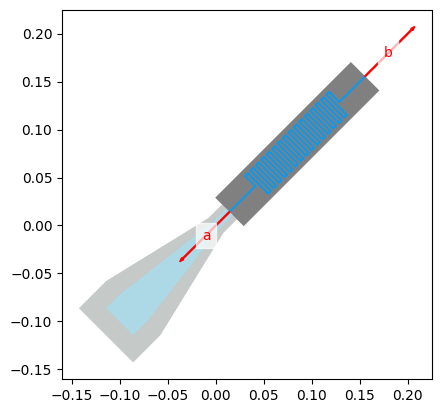

In [14]:
from SQDMetal.Comps.Inductors import InductorMeanderPinStretch

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='45', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))

##########################
InductorMeanderPinStretch(design, 'leInd', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')), dist_extend='200um',
                                                        track_width='2um', meander_spacing='4um', meander_width='30um', num_long_sections=30,
                                                        init_gap=0, mean_gap='5um'))
##########################

QUtilities.plot_highlight_component('leInd', design)

Using pins

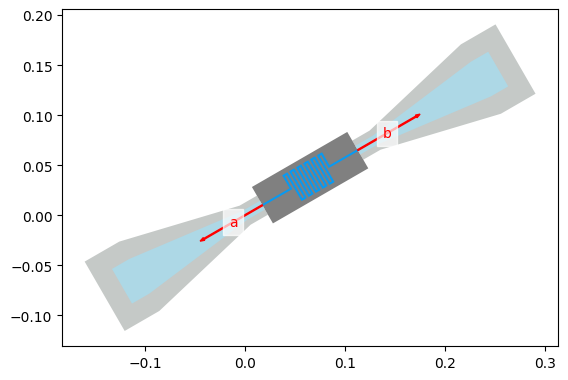

In [15]:
from SQDMetal.Comps.Inductors import InductorMeanderPinPin

from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x=f'{0.866*150}um', pos_y='75um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))

##########################
InductorMeanderPinPin(design, 'leInd', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie'), end_pin=Dict(component=f'LP2',pin='tie')),
                                                    track_width='2um', meander_spacing='4um', meander_width='30um', num_long_sections=10,
                                                    init_gap=0, mean_gap='5um'))
##########################

QUtilities.plot_highlight_component('leInd', design)

# Resonators  <a class="anchor" id="res"></a>

## Meander resonators  <a class="anchor" id="res-mean"></a>

Using absolute coordinates

Expected Length: 1mm, Actual Length: 0.9999950580975743mm
Expected Length: 1mm, Actual Length: 0.9999960457910892mm
Expected Length: 1mm, Actual Length: 0.9999918916950894mm


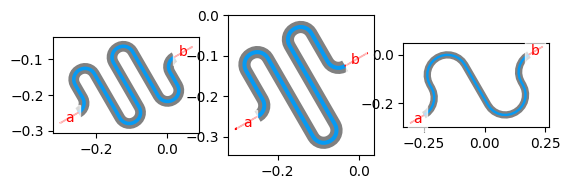

In [16]:
from SQDMetal.Comps.Resonators import ResonatorMeander

design.delete_all_components()
fig, axs = plt.subplots(ncols=3)

#CONSTRAIN RADIUS, WIDTH##
ResonatorMeander(design, 'leRes', options=dict(pos_x='-250um', pos_y='-250um', orientation=30,
                                               total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                               constr_radius='30um', constr_width_max='250um', constr_extend_length=0))
##########################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
lePts = QUtilities.calc_filleted_path(lePts, 0.03, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[0], resolution=8)
design.delete_all_components()

#CONSTRAIN RADIUS, LENGTH#
ResonatorMeander(design, 'leRes', options=dict(pos_x='-250um', pos_y='-250um', orientation=30,
                                               total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                               constr_radius='30um', constr_width_max=0, constr_extend_length='250um'))
##########################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
lePts = QUtilities.calc_filleted_path(lePts, 0.03, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[1], resolution=8)
design.delete_all_components()

#CONSTRAIN WIDTH, LENGTH###
ResonatorMeander(design, 'leRes', options=dict(pos_x='-250um', pos_y='-250um', orientation=30,
                                               total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                               constr_radius=0, constr_width_max='400um', constr_extend_length='500um'))
############################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
fillet_rad = design.qgeometry.get_component('leRes')['path']['fillet'][0]
lePts = QUtilities.calc_filleted_path(lePts, fillet_rad, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[2], resolution=8)

Using relative coordinates

Expected Length: 1mm, Actual Length: 0.9999950575725147mm
Expected Length: 1mm, Actual Length: 0.999996045423972mm
Expected Length: 1mm, Actual Length: 0.9999918934263768mm


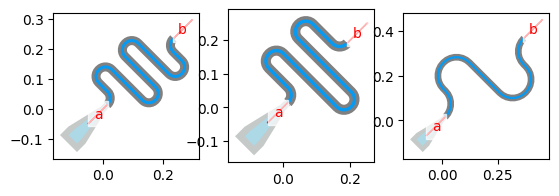

In [17]:
from SQDMetal.Comps.Resonators import ResonatorMeanderPin

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='45', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
fig, axs = plt.subplots(ncols=3)

#CONSTRAIN RADIUS, WIDTH##
ResonatorMeanderPin(design, 'leRes', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')),
                                                  total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                                  constr_radius='30um', constr_width_max='250um', constr_extend_length=0))
##########################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
lePts = QUtilities.calc_filleted_path(lePts, 0.03, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[0], resolution=8)

#CONSTRAIN RADIUS, LENGTH#
ResonatorMeanderPin(design, 'leRes', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')),
                                                  total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                                  constr_radius='30um', constr_width_max=0, constr_extend_length='250um'))
##########################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
lePts = QUtilities.calc_filleted_path(lePts, 0.03, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[1], resolution=8)

#CONSTRAIN WIDTH, LENGTH###
ResonatorMeanderPin(design, 'leRes', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')),
                                                  total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                                  constr_radius=0, constr_width_max='400um', constr_extend_length='500um'))
############################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
fillet_rad = design.qgeometry.get_component('leRes')['path']['fillet'][0]
lePts = QUtilities.calc_filleted_path(lePts, fillet_rad, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[2], resolution=8)

Using pins (can either constrain radius or width)

Expected Length: 1mm, Actual Length: 0.9999930787538981mm
Expected Length: 1mm, Actual Length: 0.9999925525931893mm


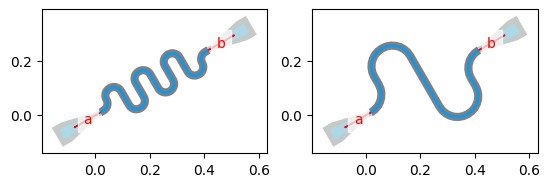

In [18]:
from SQDMetal.Comps.Resonators import ResonatorMeanderPinPin

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x=f'{0.866*500}um', pos_y='250um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
fig, axs = plt.subplots(ncols=2)

#CONSTRAIN RADIUS#########
ResonatorMeanderPinPin(design, 'leRes', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie'), end_pin=Dict(component=f'LP2',pin='tie')),
                                                     total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                                     constr_radius='30um', constr_width_max=0))
##########################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
lePts = QUtilities.calc_filleted_path(lePts, 0.03, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[0], resolution=8)

#CONSTRAIN WIDTH############
ResonatorMeanderPinPin(design, 'leRes', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie'), end_pin=Dict(component=f'LP2',pin='tie')),
                                                     total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                                     constr_radius=0, constr_width_max='400um'))
############################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
fillet_rad = design.qgeometry.get_component('leRes')['path']['fillet'][0]
lePts = QUtilities.calc_filleted_path(lePts, fillet_rad, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[1], resolution=8)

# Bounds  <a class="anchor" id="bounds"></a>

## Ground Shields <a class="anchor" id="bounds-gndshield"></a>

Basic shielding

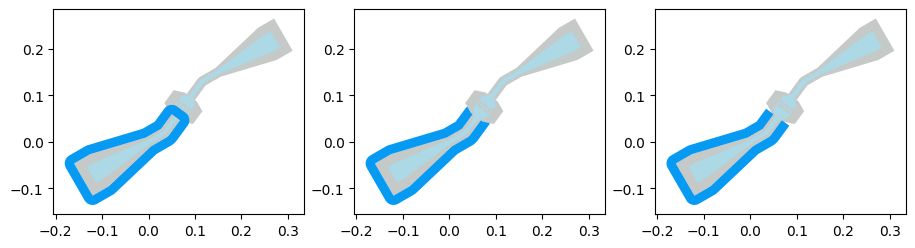

In [41]:
from SQDMetal.Comps.Bounds import BoundGroundShield

from SQDMetal.Comps.Capacitors import CapacitorInterdigitalPinPin

from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='150um', pos_y='150um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
JointExtend(design, 'jnt1', options=Dict(jointObj='LP1', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))
JointExtend(design, 'jnt2', options=Dict(jointObj='LP2', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))

CapacitorInterdigitalPinPin(design, 'leCap', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'jnt1',pin='a'), end_pin=Dict(component=f'jnt2',pin='a')),
                                                    cpw_width='15um', len_flat='10um', fing_len='10um', fing_len_gap='4um', fing_wid='4um',
                                                    len_diag='10um', fing_wid_gap='4um', N_total=5, larger_first=True))
WirePins(design, 'lead1', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', ('leCap', 'a')], fillet='10um'))
WirePins(design, 'lead2', options=Dict(pathObjPins=[('LP2', 'tie'), 'jnt2', ('leCap', 'b')], fillet='10um'))
fig, axs = plt.subplots(ncols=3); fig.set_figwidth(11)

#BASIC ENVELOPE#############
BoundGroundShield(design, 'bndsGround', options=Dict(include_geoms=['lead1', 'LP1'],
                                                     gnd_width='20um'))
############################

QUtilities.plot_highlight_component('bndsGround', design, ax=axs[0])

#EXCLUDE GEOMETRY###########
BoundGroundShield(design, 'bndsGround', options=Dict(include_geoms=['lead1', 'LP1'], exclude_geoms = ['leCap'],
                                                     gnd_width='20um'))
############################

QUtilities.plot_highlight_component('bndsGround', design, ax=axs[1])

#EXCLUDE PIN REGION#########
BoundGroundShield(design, 'bndsGround', options=Dict(include_geoms=['lead1', 'LP1'], exclude_geoms = ['leCap'],
                                                     exclude_pins=[('lead1', 'end', '100um')], gnd_width='20um'))
############################

QUtilities.plot_highlight_component('bndsGround', design, ax=axs[2])